In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
dir = "../figures/dpapt"
os.makedirs(dir, exist_ok=True)
df = pd.read_csv("../results/dpapt/t_drive_small/t_drive_small/stats.csv")

/tmp/ipykernel_1350959/4085784880.py:24: UserWarning: 
The dashes list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


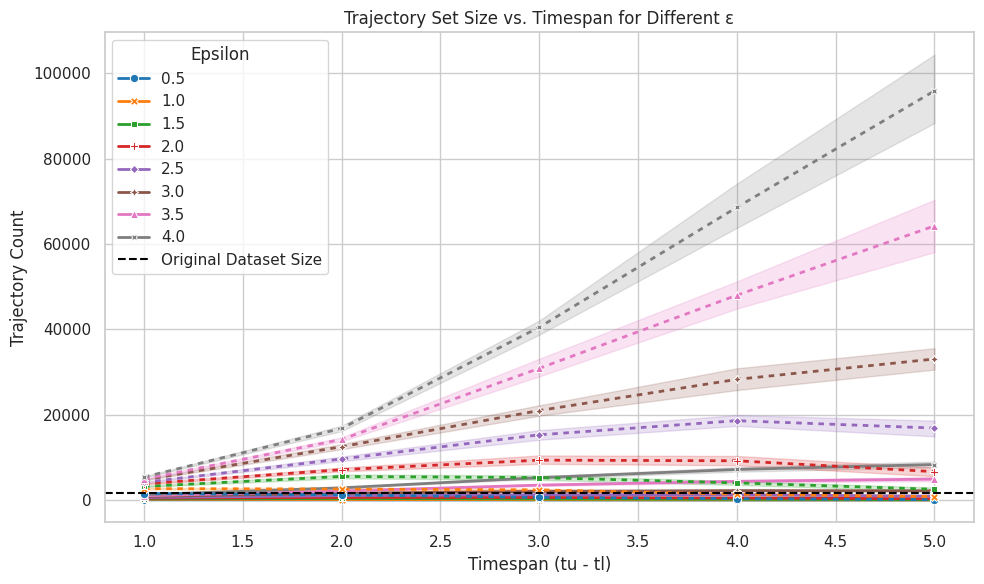

In [19]:
# Prepare data
df["timespan"] = df["tu"] - df["tl"]

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for each epsilon, grouped by size_unique and size_acc
sns.lineplot(
    data=df,
    x="timespan",
    y="size_unique",
    hue="eps",
    style="eps",
    markers=True,
    dashes=False,
    marker="o",
    palette="tab10",
    legend="full",
    linewidth=2,
)
sns.lineplot(
    data=df,
    x="timespan",
    y="size_acc",
    hue="eps",
    style="eps",
    markers=True,
    dashes=[(2, 2)],
    marker="s",
    palette="tab10",
    legend=False,
    linewidth=2
)

# Add horizontal baseline
plt.axhline(1560, linestyle="--", color="black", label="Original Dataset Size")

# Labels and title
plt.title("Trajectory Set Size vs. Timespan for Different ε")
plt.xlabel("Timespan (tu - tl)")
plt.ylabel("Trajectory Count")
plt.legend(title="Epsilon")
plt.tight_layout()

# Save figure
plt.savefig(f"{dir}/size_vs_timespan_by_eps.svg", format="svg")
plt.show()


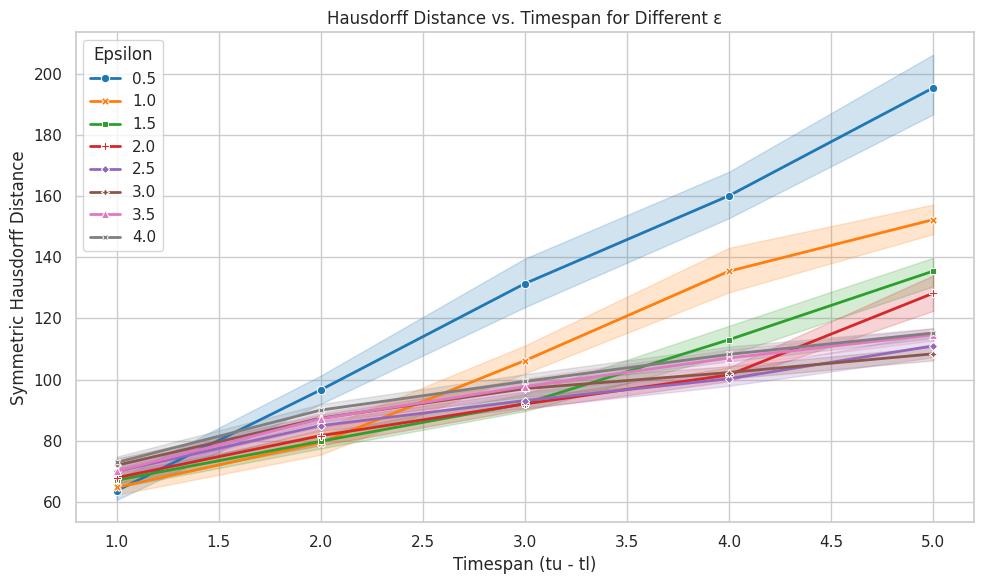

In [20]:
# Prepare data and filter
df["timespan"] = df["tu"] - df["tl"]
df_filtered = df[df["hausdorff"] > 0]


# Create the plot
plt.figure(figsize=(10, 6))

# Lineplot for Hausdorff distance
sns.lineplot(
    data=df_filtered,
    x="timespan",
    y="hausdorff",
    hue="eps",
    style="eps",
    markers=True,
    dashes=False,
    palette="tab10",
    marker="d",
    linewidth=2
)

# Labels and title
plt.title("Hausdorff Distance vs. Timespan for Different ε")
plt.xlabel("Timespan (tu - tl)")
plt.ylabel("Symmetric Hausdorff Distance")
plt.legend(title="Epsilon")
plt.tight_layout()

# Save figure
plt.savefig(f"{dir}/hausdorff_vs_timespan_by_eps.svg", format="svg")
plt.show()



In [24]:
# Filter for failed cases (Hausdorff == 0)
df_failed = df[df["hausdorff"] == 0].copy()
df_failed["timespan"] = df_failed["tu"] - df_failed["tl"]

# Check if there are any failed cases
if df_failed.empty:
    print("No failed cases with Hausdorff distance = 0.")
else:
    # Set seaborn theme
    sns.set_theme(style="whitegrid")

    # Plot histogram of failures by timespan and epsilon
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df_failed,
        x="timespan",
        hue="eps",
        multiple="dodge",
        shrink=0.8,
        discrete=True
    )

    # Labels and title
    plt.title("Frequency of Failed Outputs (Hausdorff Distance = 0)")
    plt.xlabel("Timespan (tu - tl)")
    plt.ylabel("Count of Failures")
    plt.legend(title="Epsilon")
    plt.tight_layout()

    # Save figure
    plt.savefig(f"{dir}/hausdorff_zero_failures.svg", format="svg")
    plt.show()


No failed cases with Hausdorff distance = 0.
